In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('Data Train.csv')
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


- state: Negara bagian di mana pelanggan tinggal.
- account_length: Lamanya waktu (dalam hari atau bulan) pelanggan telah dikaitkan dengan penyedia layanan.
- area_code: Kode area telepon yang terkait dengan nomor telepon pelanggan.
- international_plan: Indikator biner (ya/tidak) yang menunjukkan apakah pelanggan memiliki paket panggilan internasional.
- voice_mail_plan: Indikator biner (ya/tidak) yang menunjukkan apakah pelanggan memiliki paket pesan suara.
- number_vmail_messages: Jumlah pesan suara yang diterima pelanggan.
- total_day_minutes: Jumlah total menit yang digunakan pelanggan selama panggilan siang hari.
- total_day_calls: Jumlah total panggilan yang dilakukan pelanggan pada siang hari.
- total_day_charge: Total biaya yang ditagihkan ke pelanggan untuk panggilan siang hari.
- total_eve_minutes: Jumlah total menit yang digunakan pelanggan selama panggilan malam.
- total_eve_calls: Jumlah total panggilan yang dilakukan pelanggan pada malam hari.
- total_eve_charge: Total biaya yang ditagihkan ke pelanggan untuk panggilan malam hari.
- total_night_minutes: Jumlah total menit yang digunakan pelanggan selama panggilan malam hari.
- total_night_calls: Jumlah total panggilan yang dilakukan pelanggan pada malam hari.
- total_night_charge: Total biaya yang ditagihkan ke pelanggan untuk panggilan malam hari.
- total_intl_minutes: Jumlah total menit internasional yang digunakan oleh pelanggan.
- total_intl_calls: Jumlah total panggilan internasional yang dilakukan oleh pelanggan.
- total_intl_charge: Total biaya yang ditagihkan ke pelanggan untuk panggilan internasional.
- number_customer_service_calls: Jumlah panggilan layanan pelanggan yang dilakukan oleh pelanggan.
- churn: Indikator biner (ya/tidak) yang menunjukkan apakah pelanggan telah melakukan churn (yaitu, berhenti menggunakan layanan).

### Statistical Analysis & EDA

In [3]:
print(data.isna().sum())
print(data.shape)

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64
(4250, 20)


In [4]:
data[data.duplicated()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


Dalam data ini tidak terdapat missing value dan duplikat

In [5]:
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


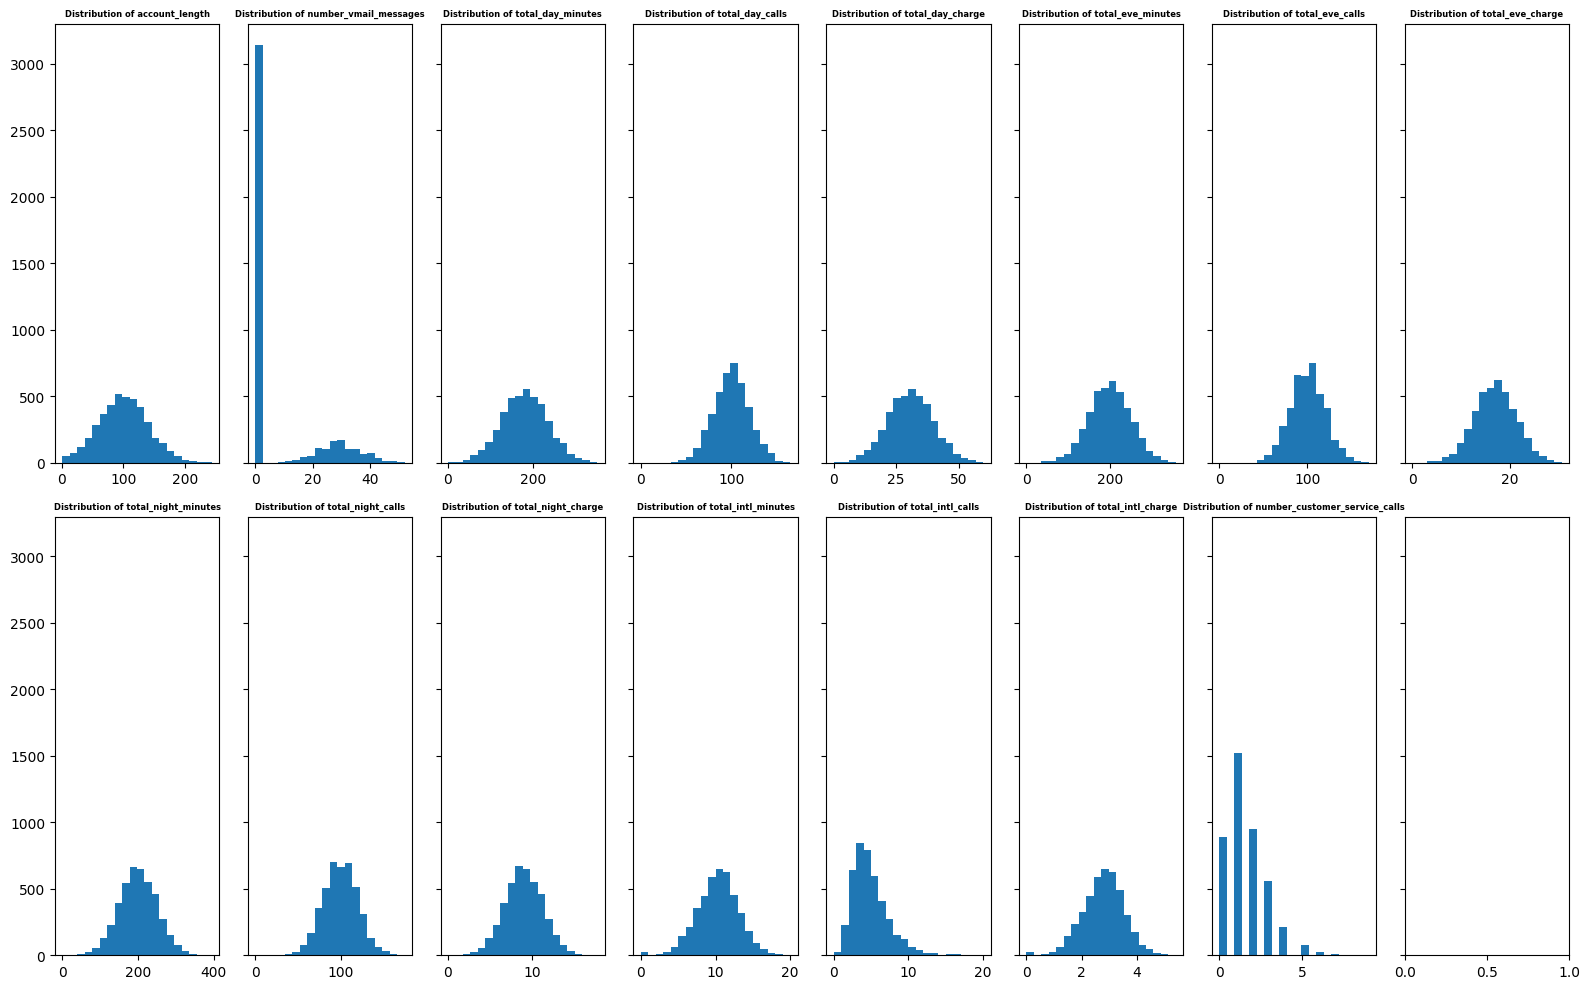

In [6]:
qualitative_data_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

def dist_plot(data, range_data_first, range_data_last):
  fig, axs = plt.subplots(2, 8, sharey=True, figsize=(16,10))
  font_prop = font_manager.FontProperties(size=6, weight='bold')
  for idx, i in enumerate(qualitative_data_cols[range_data_first:range_data_last]):
    row = 0 if idx < 8 else 1
    col = idx % 8
    axs[row, col].set_title(f'Distribution of {i}', fontproperties=font_prop)
    axs[row, col].hist(data[i], bins=20)
  plt.tight_layout()
  plt.show()

dist_plot(data, 0, 15)

Dari distribusi data pada kolom data numerik (kualitatif), bisa terlihat bahwa rata-rata kolomnya itu sudah hampir terdistribusi normal. Hanya saja terdapat beberapa kolom yang distribusi datanya tidak seimbang (skewed), seperti number_vmail_messages, total_intl_calls, number_customer_service_calls

C:\Users\hardi\AppData\Local\Temp\ipykernel_2340\1137932029.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='crest', fmt='.3f')


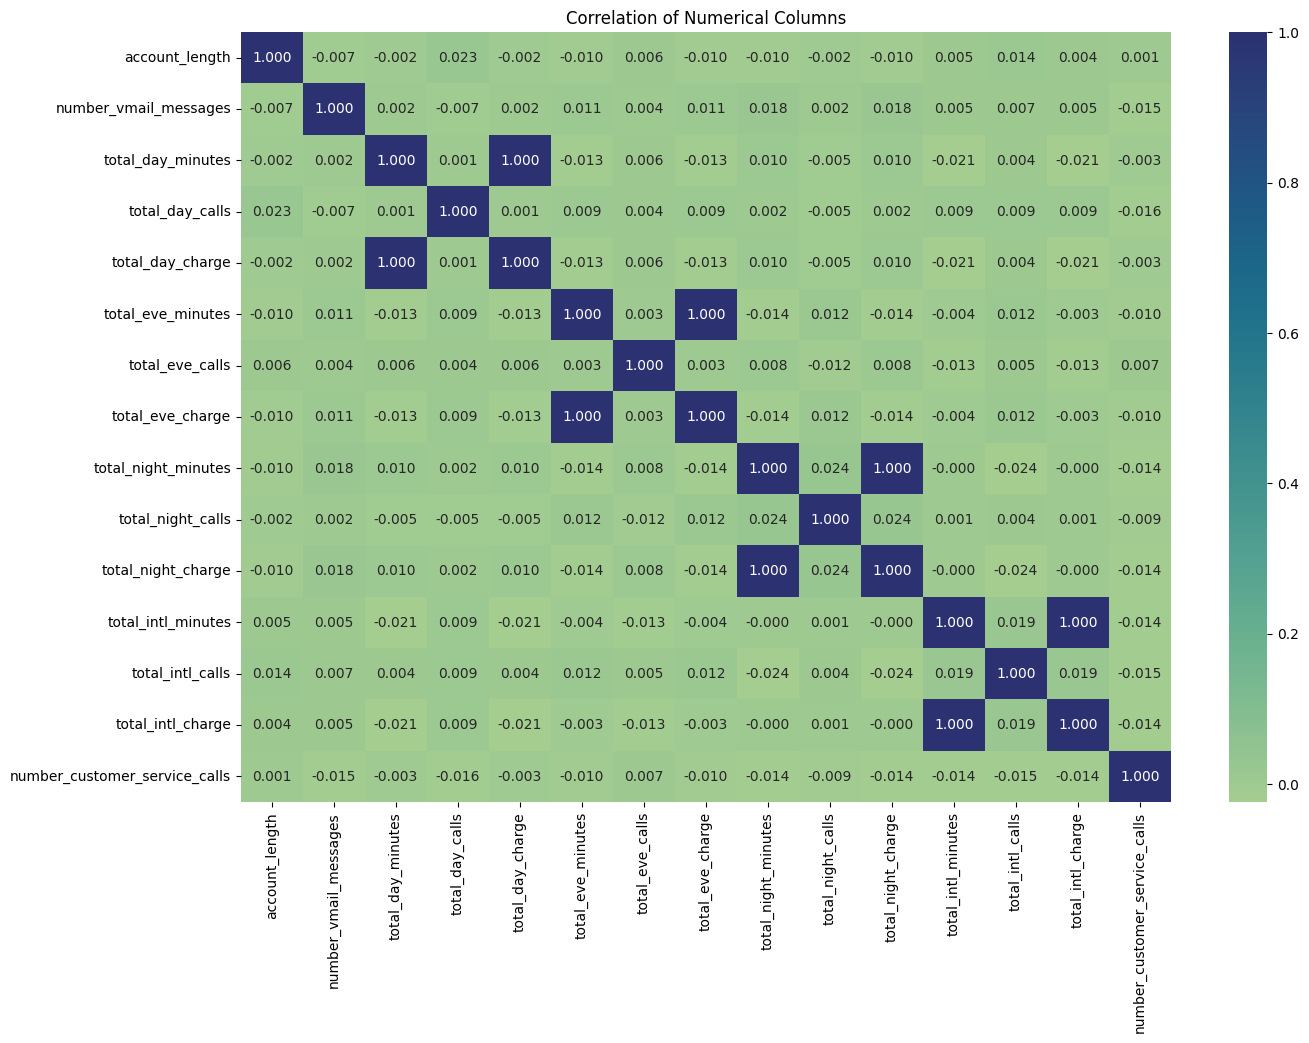

In [7]:
def corr_data(data):
  plt.figure(figsize=(15,10))
  plt.title('Correlation of Numerical Columns')
  sns.heatmap(data.corr(), annot=True, cmap='crest', fmt='.3f')
  plt.show()

corr_data(data)

Hasil dari pengecekan korelasi pada tiap kolom dengan menggunakan heatmap menunjukkan bahwa terdapat beberapa kolom yang memiliki hubungan korelasi (munculnya pola yang sama pada waktu yang bersamaan) yang positif sempurna (bernilai 1).

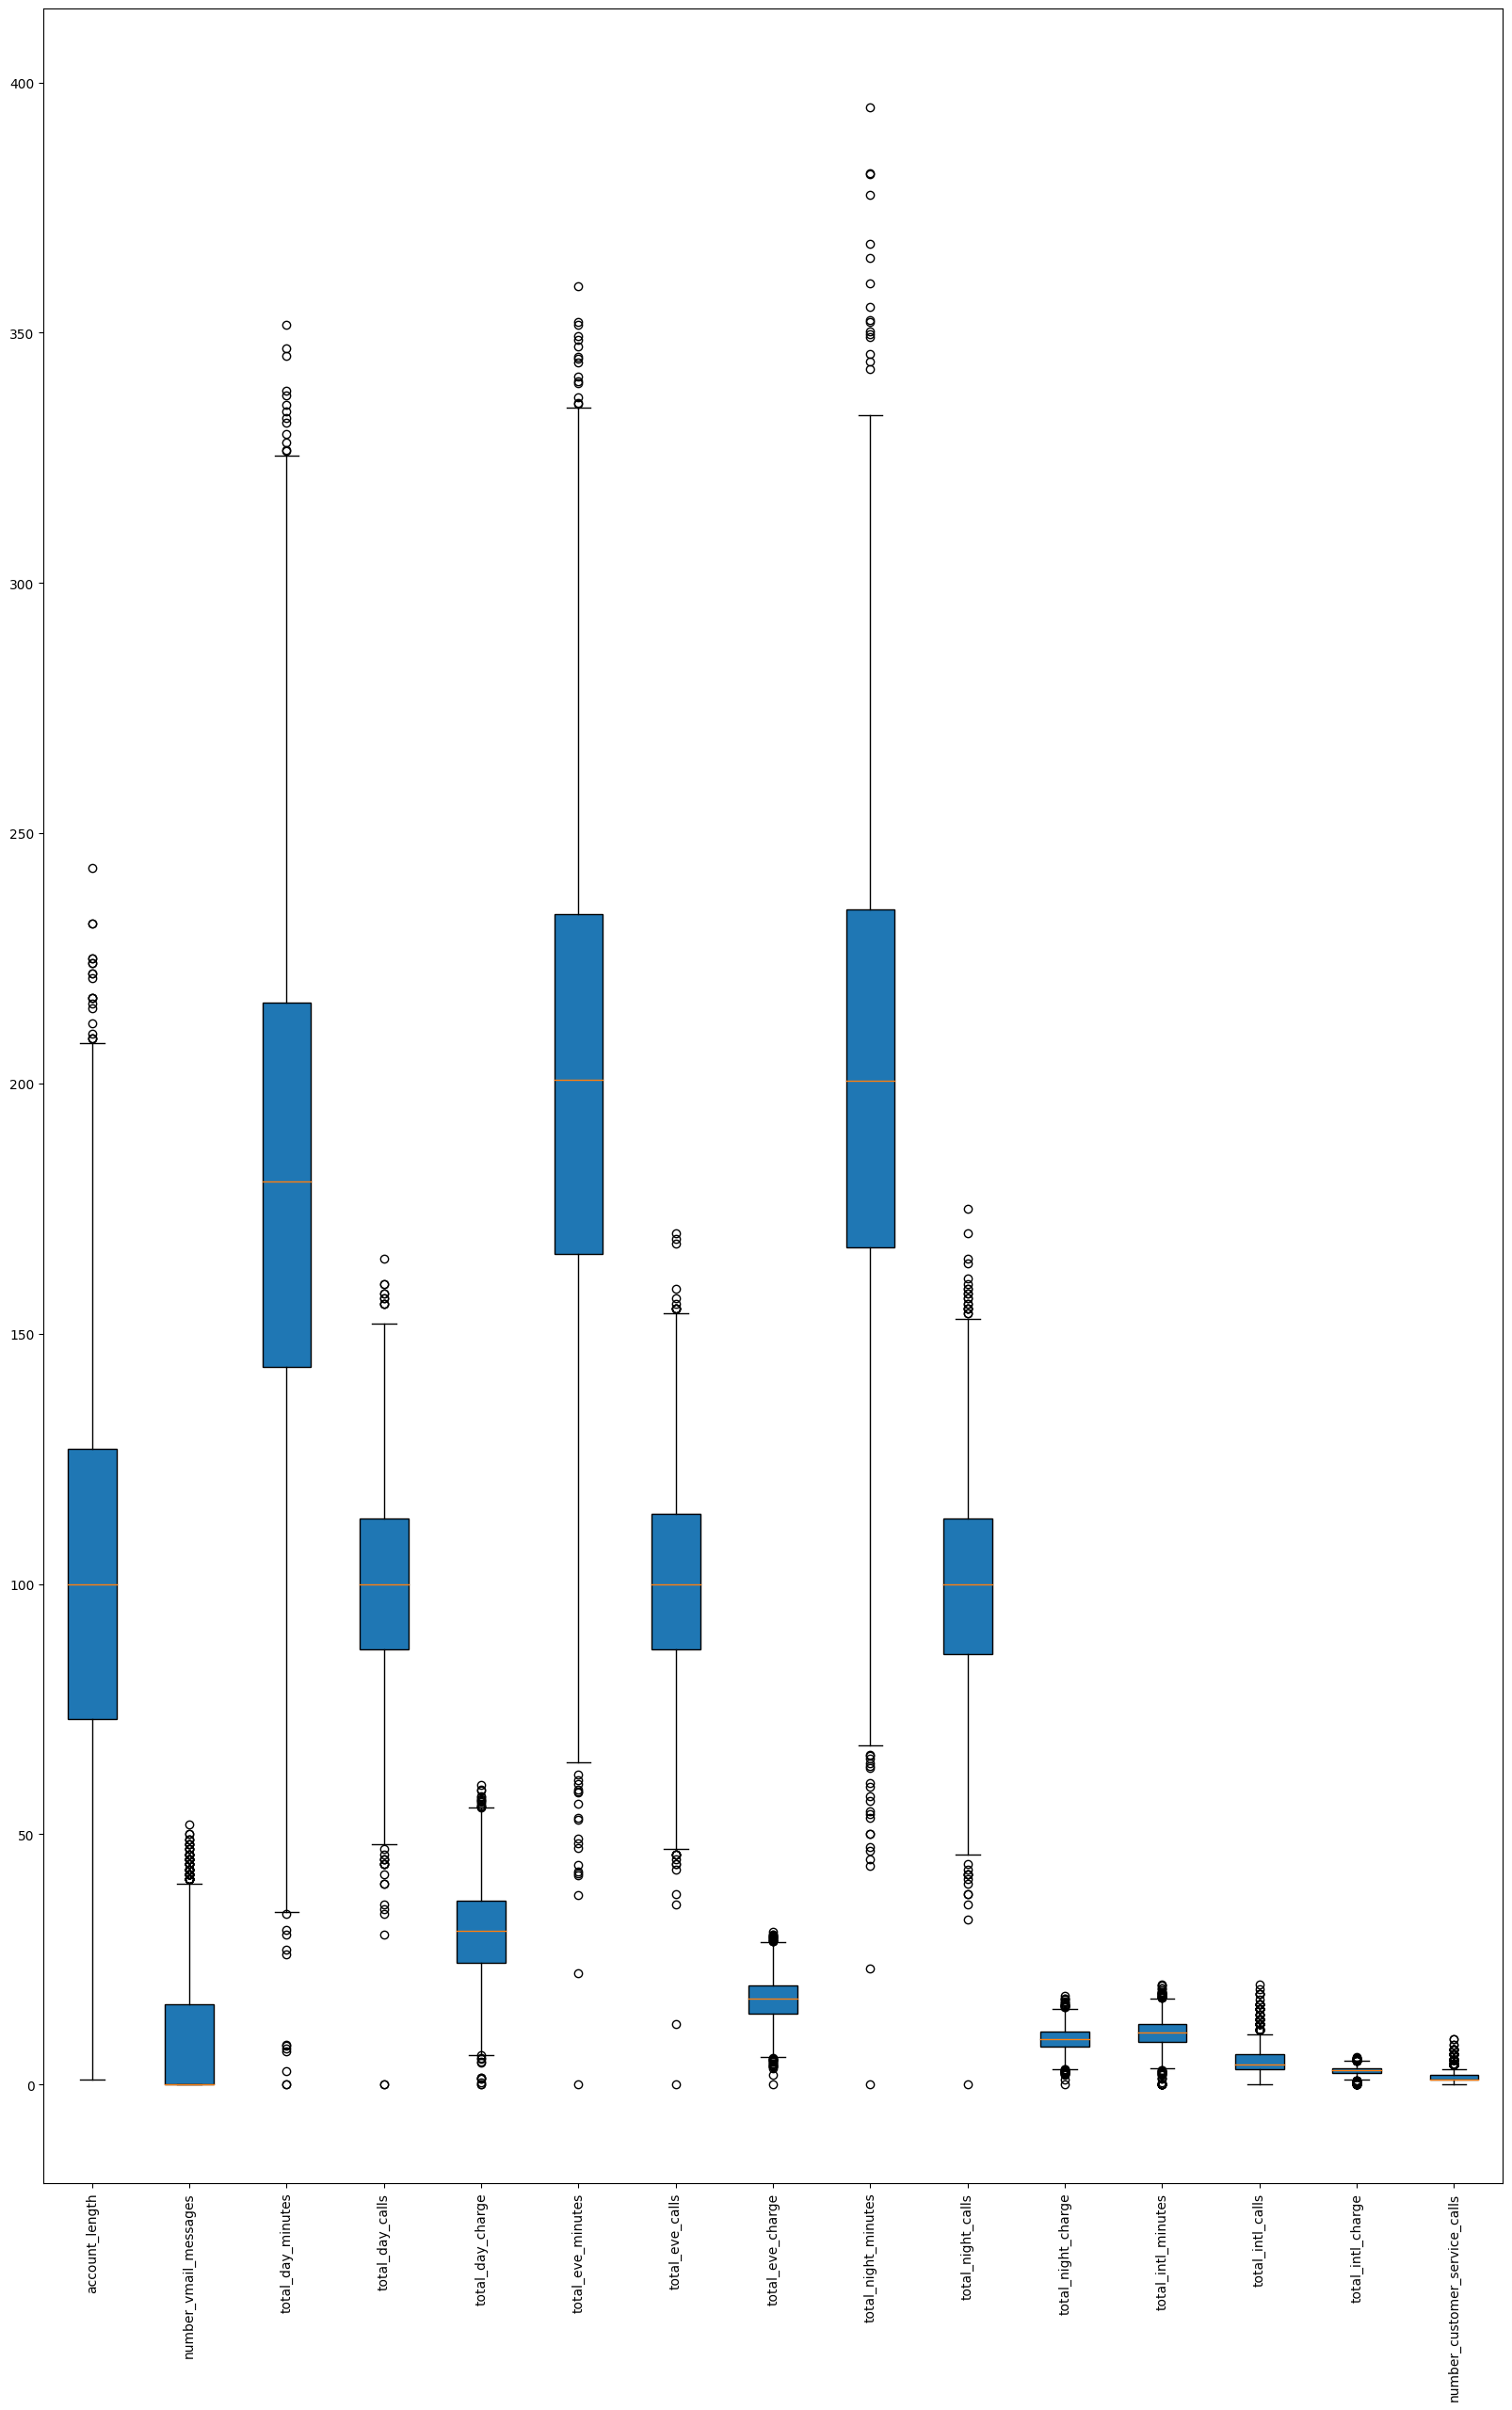

In [8]:
qualitative_data = data[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]

def show_outlier(data):
    fig, ax = plt.subplots(figsize=(20,30))
    ax.boxplot(x=data, patch_artist=True)
    ax.set_xticklabels(labels=qualitative_data ,rotation = 90)
    plt.show()

show_outlier(qualitative_data)

Pada beberapa kolom terdapat data yang outlier

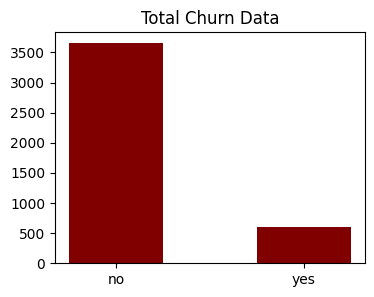

In [9]:
count = data['churn'].value_counts()
index = count.index
value = count.values

fig = plt.figure(figsize=(4,3))
plt.title('Total Churn Data')
plt.bar(index, value, color="maroon", width=0.5)

plt.show()

Terdapat ketidakseimbangan pada data, dimana data dengan klasifikasi churn 'no' lebih banyak dibandingkan dengan 'yes', lebih dari 50%

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
target_category = {'churn' : {'no' : 0, 'yes' : 1}}

data['churn'] = data['churn'].map(target_category['churn'])
label_encoder.fit(data['churn'])
data['churn'] = label_encoder.transform(data['churn'])

data['churn'].unique()

array([0, 1], dtype=int64)

Mengubah target data menjadi bentuk numerik untuk memudahkan dalam proses analisis

In [11]:
def grouping_plot(data, column):
  if column == 'state':
    group_churn = data.groupby(column)['churn'].apply(lambda x : (x == 1).sum()).sort_values()
    group_churn.plot(kind='bar', figsize=(12, 6), color='maroon')
    plt.ylabel('Churn Rate')
  else:
    group_churn = data.groupby(column)['churn'].apply(lambda x : (x == 1).sum())
    ax = group_churn.plot(kind='pie', figsize=(15, 6), autopct='%1.0f%%', legend=True, fontsize=10, ylabel='')
    ax.legend(fontsize='small', loc='upper left')

  plt.title(f'Churn Rate by {column}')
  plt.xlabel(f'{column}')
  plt.xticks(rotation=90)
  plt.show()

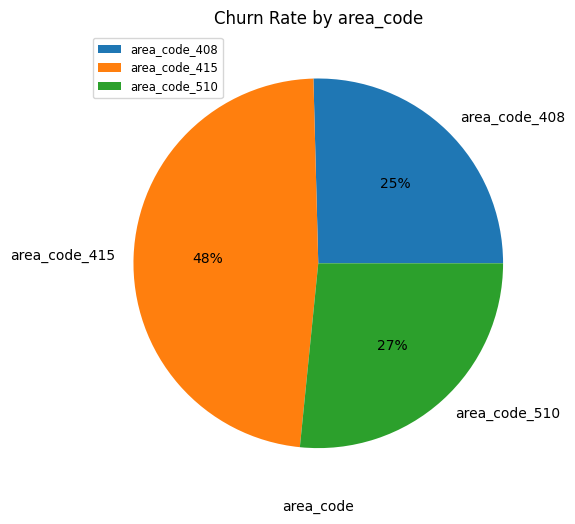

In [12]:
grouping_plot(data, 'area_code')

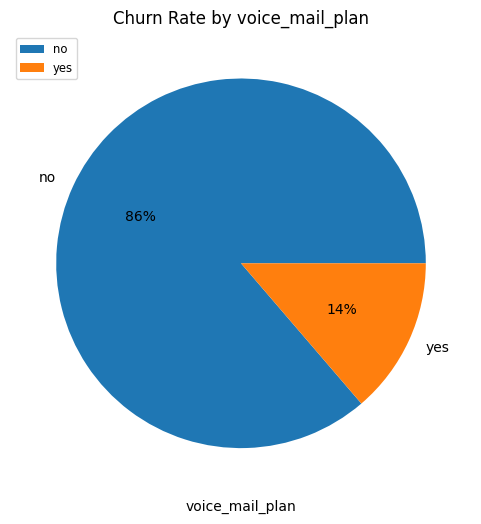

In [13]:
grouping_plot(data, 'voice_mail_plan')

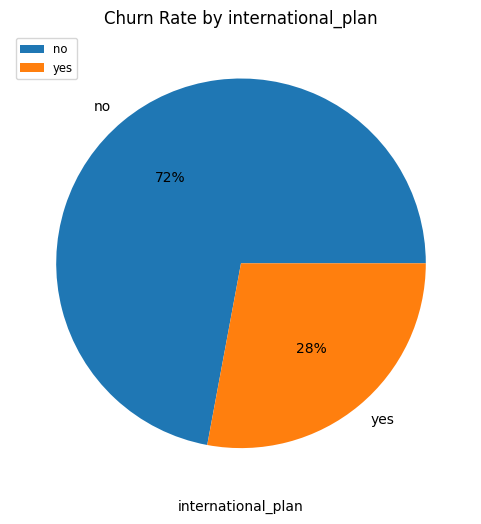

In [14]:
grouping_plot(data, 'international_plan')

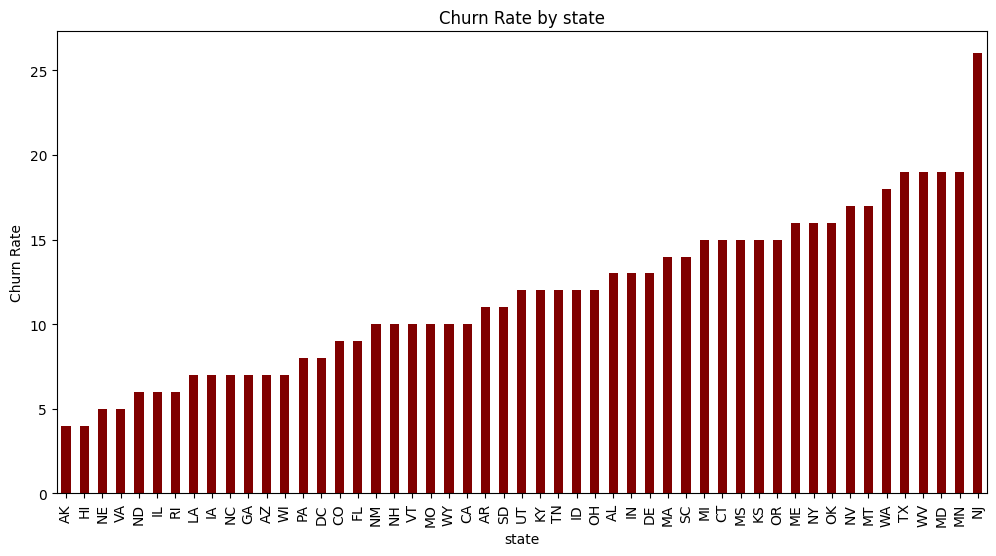

In [15]:
grouping_plot(data, 'state')

Plot untuk melihat besaran nilai pada beberapa categorical column terhadap kemungkinan churn

In [16]:
data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
data['total_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
data['total_charges'] = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charges
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,611.5,329,55.54
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,527.2,328,59.00
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,558.2,248,65.02
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,501.9,356,49.36
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,779.3,314,76.28


C:\Users\hardi\AppData\Local\Temp\ipykernel_2340\1137932029.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='crest', fmt='.3f')


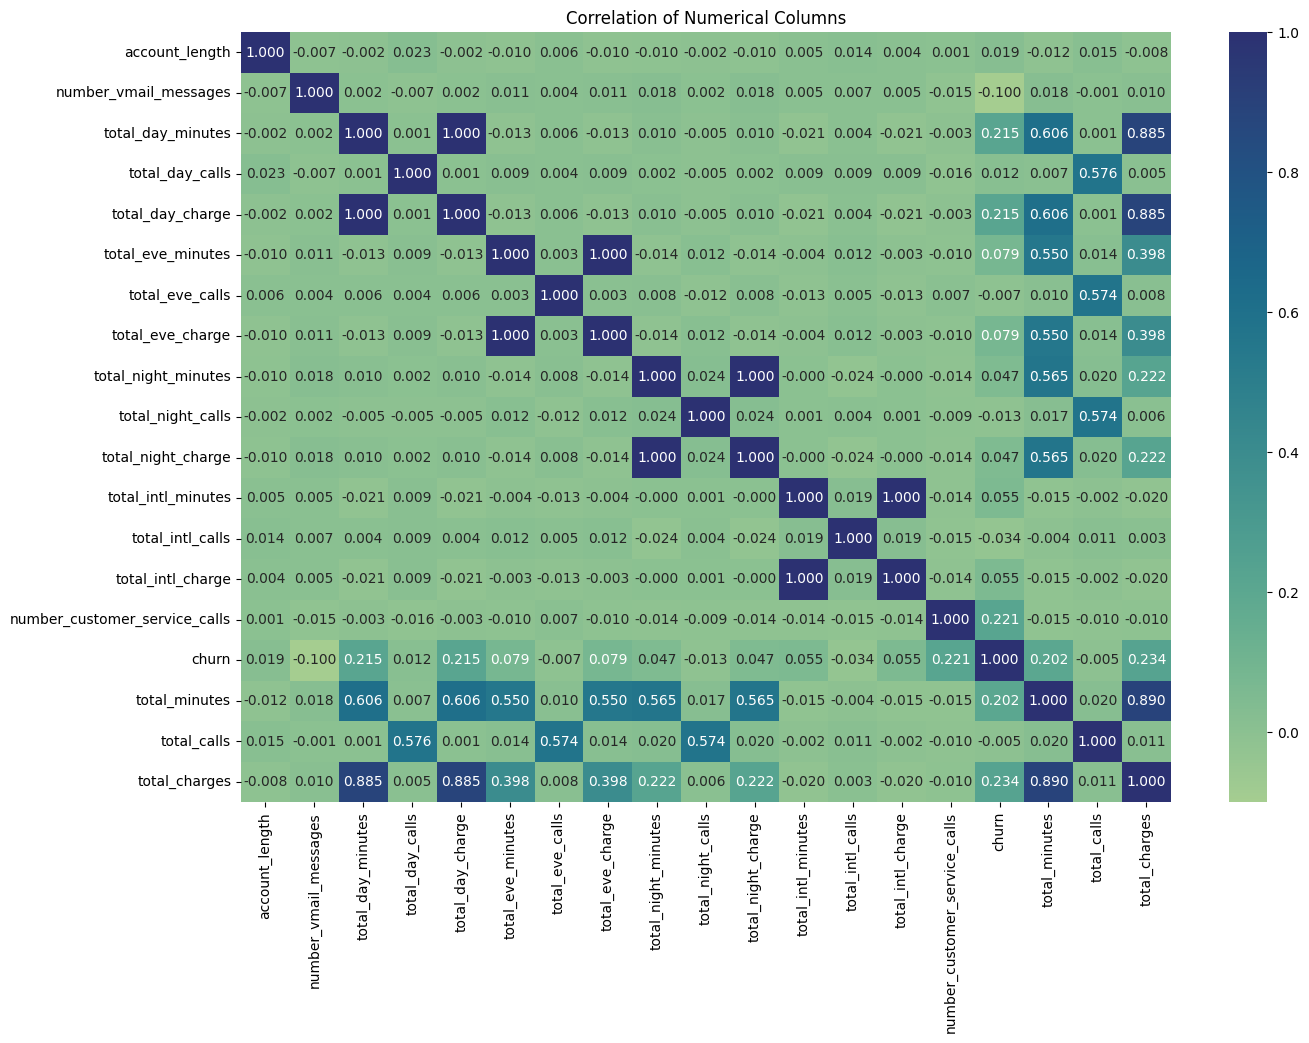

In [17]:
corr_data(data)

In [18]:
from scipy.stats import ttest_ind

def hypothesis_test(data, column):
  data_churn = data[data['churn'] == 1][column]
  data_non_churn = data[data['churn'] == 0][column]

  t_statistic, p_value = ttest_ind(data_non_churn, data_churn)
  alpha = 0.05

  print(f'Test statistic: {t_statistic}')
  print(f'p-value: {p_value}')

  if p_value < alpha:
      print(f'Reject the null hypothesis. There is a significant difference in average {column} between churned and non-churned customers.')
  else:
      print(f'Fail to reject the null hypothesis. There is no significant difference in average {column} between churned and non-churned customers.')


In [19]:
hypothesis_test(data, 'total_minutes')

Test statistic: -13.439870415300485
p-value: 2.332712336238055e-40
Reject the null hypothesis. There is a significant difference in average total_minutes between churned and non-churned customers.


In [20]:
hypothesis_test(data, 'total_calls')

Test statistic: 0.3027328330651385
p-value: 0.7621082965640166
Fail to reject the null hypothesis. There is no significant difference in average total_calls between churned and non-churned customers.


In [21]:
hypothesis_test(data, 'total_charges')

Test statistic: -15.69270961944851
p-value: 5.424598212128414e-54
Reject the null hypothesis. There is a significant difference in average total_charges between churned and non-churned customers.


### Data Preprocessing

#### Hilangkan Outlier

In [22]:
from scipy import stats
import numpy as np

print(f'Length rows before remove outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))
for col in qualitative_data_cols:
    zscore = abs(stats.zscore(data[col]))
    filtered_entries = (zscore < 3) & filtered_entries

data_rm_outlier = data[filtered_entries]

print(f'Length rows after remove outlier: {len(data_rm_outlier)}')
data_rm_outlier.head()

Length rows before remove outlier: 4250
Length rows after remove outlier: 4031


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charges
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,611.5,329,55.54
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,527.2,328,59.00
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,558.2,248,65.02
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,501.9,356,49.36
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,779.3,314,76.28


#### Encoding Categorical Data

In [23]:
label_e = ['international_plan', 'voice_mail_plan']
one_hot_e = ['state', 'area_code']

In [24]:
def unique_value(df, columns):
    for col in columns:
        print(f'Name Column : {col}')
        print(f'List Category : {df[col].unique()}\n')

unique_value(data, label_e)

Name Column : international_plan
List Category : ['no' 'yes']

Name Column : voice_mail_plan
List Category : ['yes' 'no']



In [25]:
unique_value(data, one_hot_e)

Name Column : state
List Category : ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']

Name Column : area_code
List Category : ['area_code_415' 'area_code_408' 'area_code_510']



In [26]:
categorical={
    'international_plan' : {'no' : 0, 'yes' : 1},
    'voice_mail_plan' : {'no' : 0, 'yes' : 1}
}

for col in categorical:
    data[col] = data[col].map(categorical[col])
    label_encoder.fit(data[col])
    data[col] = label_encoder.transform(data[col])

In [27]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(data[one_hot_e])

column_names = onehot_encoder.get_feature_names_out(input_features = one_hot_e)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=column_names)

new_train_data = pd.concat([data, onehot_encoded_df], axis=1)
new_train_data.drop(columns=one_hot_e, inplace=True)

new_train_data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charges,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,611.5,329,55.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,527.2,328,59.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,558.2,248,65.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,501.9,356,49.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,779.3,314,76.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Feature Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

norm_data_col = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',	'total_day_charge',
                 'total_eve_minutes',	'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge',
                 'total_intl_minutes', 'total_intl_calls', 'total_minutes', 'total_calls', 'total_charges']

scaler = MinMaxScaler()
new_train_data[norm_data_col] = scaler.fit_transform(new_train_data[norm_data_col])

new_train_data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charges,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510
0,0.438017,0,1,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,3.70,1,0,0.558916,0.635135,0.489942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.561983,0,0,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,3.29,0,0,0.418813,0.630631,0.537614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.342975,1,0,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,1.78,2,0,0.470334,0.270270,0.620557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.305785,1,0,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,2.73,3,0,0.376766,0.756757,0.404795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.495868,0,1,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,2.03,3,0,0.837793,0.567568,0.775696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Modelling Process

In [29]:
X = new_train_data.drop(columns='churn')
y = new_train_data['churn']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression' : LogisticRegression(),
    'K-NN' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier()
}

model_names = []
precision_scores = []
recall_scores = []
f1_scores = []

best_models = {}

def modelling_process (models, X_train, y_train, use_grid_search=0):
  global best_models
  for name, model in models.items():
      if use_grid_search == 1:
          clf = GridSearchCV(models[name], params[name], cv=5)
          clf.fit(X_train, y_train)

          print(f"Best parameters for {name}: {clf.best_params_}")
          print(f"Best score for {name}: {clf.best_score_}")
          y_pred = clf.predict(X_test)

          print(classification_report(y_test, y_pred))
          print("-" * 50)
      else :
          print(f"Training {name}...")
          model.fit(X_train, y_train)
          y_pred = model.predict(X_test)

          print(f"Evaluation metrics for {name}:")

          accuracy = accuracy_score(y_test, y_pred)
          precision = precision_score(y_test, y_pred)
          recall = recall_score(y_test, y_pred)
          f1 = f1_score(y_test, y_pred)

          print(f"Accuracy: {accuracy:.4f}")
          print(f"Precision: {precision:.4f}")
          print(f"Recall: {recall:.4f}")
          print(f"F1 Score: {f1:.4f}")
          print(classification_report(y_test, y_pred))
          print("-" * 50)

          model_names.append(name)
          precision_scores.append(precision)
          recall_scores.append(recall)
          f1_scores.append(f1)
  if use_grid_search == 1:
    best_model = clf.best_estimator_
    best_models[name] = best_model
    return best_models
  else :
    pass
modelling_process(models, X_train, y_train)

Training Logistic Regression...
Evaluation metrics for Logistic Regression:
Accuracy: 0.8682
Precision: 0.6735
Recall: 0.2558
F1 Score: 0.3708
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       721
           1       0.67      0.26      0.37       129

    accuracy                           0.87       850
   macro avg       0.78      0.62      0.65       850
weighted avg       0.85      0.87      0.84       850

--------------------------------------------------
Training K-NN...


c:\Users\hardi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation metrics for K-NN:
Accuracy: 0.8541
Precision: 0.5641
Recall: 0.1705
F1 Score: 0.2619
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       721
           1       0.56      0.17      0.26       129

    accuracy                           0.85       850
   macro avg       0.72      0.57      0.59       850
weighted avg       0.82      0.85      0.82       850

--------------------------------------------------
Training DecisionTreeClassifier...
Evaluation metrics for DecisionTreeClassifier:
Accuracy: 0.9424
Precision: 0.7899
Recall: 0.8450
F1 Score: 0.8165
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       721
           1       0.79      0.84      0.82       129

    accuracy                           0.94       850
   macro avg       0.88      0.90      0.89       850
weighted avg       0.94      0.94      0.94       850

--------------------------------------------------

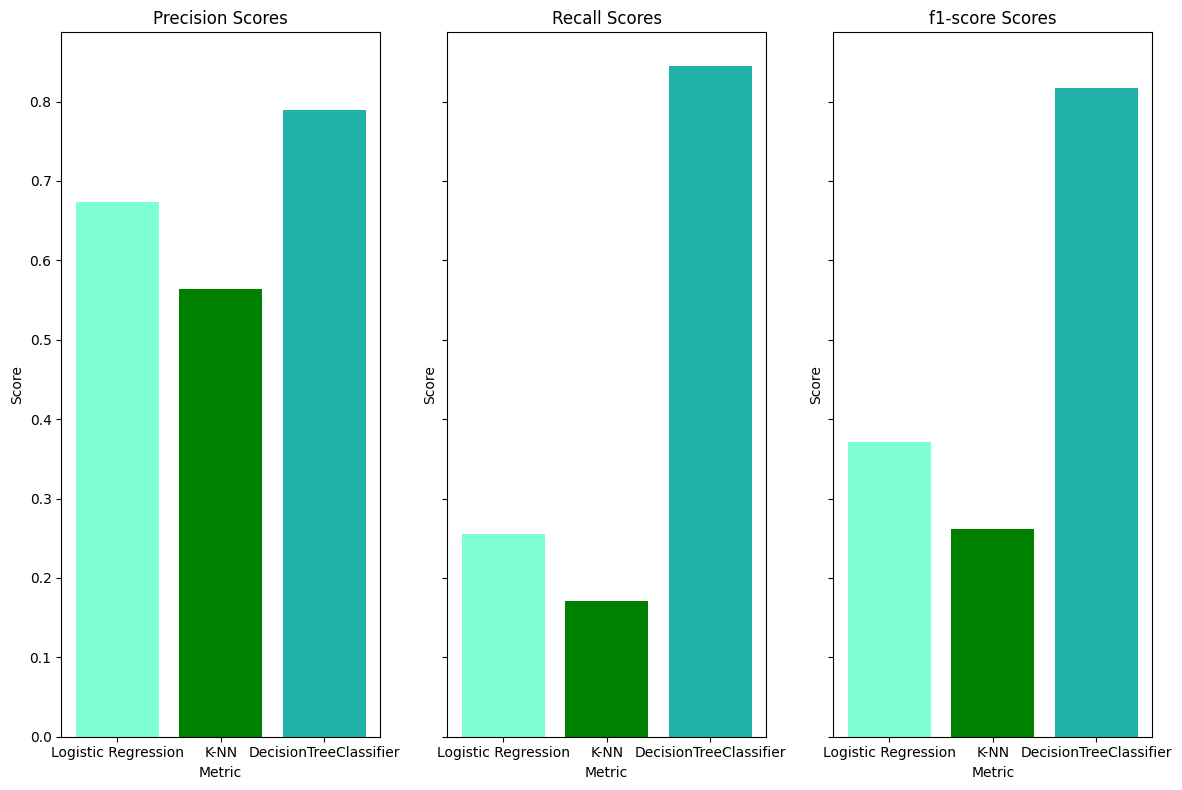

In [32]:
metric_scores = [precision_scores, recall_scores, f1_scores]
metric_names = ['Precision', 'Recall', 'f1-score']
color = ['aquamarine', 'green', 'lightseagreen']

def plot_metric(metric_scores, model_name, metric_names, colors):
  fig, axs = plt.subplots(1, len(metric_scores), figsize=(12, 8), sharey=True)
  model_name = model_name
  metrics = metric_names
  for i, scores in enumerate(metric_scores):
      axs[i].bar(model_name, scores, color=colors)
      axs[i].set_title(f'{metrics[i]} Scores')
      axs[i].set_ylabel('Score')
      axs[i].set_xlabel('Metric')
  plt.tight_layout()
  plt.show()

plot_metric(metric_scores, model_names, metric_names, color)

#### Mencoba metode SMOTE untuk imbalancing data saat proses pemodelan dengan KNN dan Logistic Regression

In [33]:
from imblearn.over_sampling import SMOTE

def imbalanced_train(model_type, name_model):
  smote = SMOTE(random_state=42)

  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

  model = model_type
  model.fit(X_train_resampled, y_train_resampled)

  y_pred = model.predict(X_test)
  print(name_model)
  print(classification_report(y_test, y_pred))
  print('-'*50)

imbalanced_train(LogisticRegression(), 'Logistic Regression')
imbalanced_train(KNeighborsClassifier(), 'KNN')

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       721
           1       0.37      0.71      0.49       129

    accuracy                           0.77       850
   macro avg       0.65      0.75      0.67       850
weighted avg       0.85      0.77      0.80       850

--------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       721
           1       0.31      0.61      0.41       129

    accuracy                           0.73       850
   macro avg       0.61      0.68      0.62       850
weighted avg       0.82      0.73      0.76       850

--------------------------------------------------


c:\Users\hardi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Mencoba menggunakan GridSearchCV

In [34]:
params = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'K-NN': {'n_neighbors': [3, 5, 7, 9, 11]},
    'DecisionTreeClassifier': {'max_depth': [3, 5, 7, 9, None]}
}

modelling_process(models, X_train, y_train, 1)

c:\Users\hardi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hardi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best parameters for Logistic Regression: {'C': 10}
Best score for Logistic Regression: 0.8697058823529412
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       721
           1       0.64      0.26      0.37       129

    accuracy                           0.87       850
   macro avg       0.76      0.62      0.65       850
weighted avg       0.84      0.87      0.84       850

--------------------------------------------------
Best parameters for K-NN: {'n_neighbors': 9}
Best score for K-NN: 0.8791176470588236
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       721
           1       0.67      0.16      0.25       129

    accuracy                           0.86       850
   macro avg       0.77      0.57      0.59       850
weighted avg       0.84      0.86      0.82       850

--------------------------------------------------
Best parameters for DecisionTreeClassifier: {'max_dep

{'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5)}

In [35]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Akan digunakan untuk bisa menyimpan model

#### Mencoba Menggunakan PCA

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

modelling_process(models, X_train, y_train)

Training Logistic Regression...
Evaluation metrics for Logistic Regression:
Accuracy: 0.8674
Precision: 0.6471
Recall: 0.2115
F1 Score: 0.3188
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       907
           1       0.65      0.21      0.32       156

    accuracy                           0.87      1063
   macro avg       0.76      0.60      0.62      1063
weighted avg       0.84      0.87      0.84      1063

--------------------------------------------------
Training K-NN...
Evaluation metrics for K-NN:
Accuracy: 0.8598
Precision: 0.5686
Recall: 0.1859
F1 Score: 0.2802
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       907
           1       0.57      0.19      0.28       156

    accuracy                           0.86      1063
   macro avg       0.72      0.58      0.60      1063
weighted avg       0.83      0.86      0.83      1063

---------------------------------------

In [37]:
import pickle

pickle.dump(decision_tree, open("best_model.pkl", "wb"))

### Proses Test Data

In [38]:
test_data = pd.read_csv('Data Test.csv')
test_data.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [39]:
test_data.isna().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [40]:
test_data = test_data.drop('id', axis=1)

In [41]:
test_data[test_data.duplicated()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls


In [42]:
test_data['total_minutes'] = test_data['total_day_minutes'] + test_data['total_eve_minutes'] + test_data['total_night_minutes']
test_data['total_calls'] = test_data['total_day_calls'] + test_data['total_eve_calls'] + test_data['total_night_calls']
test_data['total_charges'] = test_data['total_day_charge'] + test_data['total_eve_charge'] + test_data['total_night_charge']
test_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charges
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,707.2,300,72.86
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,647.9,317,65.91
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,630.9,245,55.77
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,538.5,346,56.80
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,652.1,303,55.96


In [43]:
unique_value(test_data, label_e)
unique_value(test_data, one_hot_e)

Name Column : international_plan
List Category : ['no' 'yes']

Name Column : voice_mail_plan
List Category : ['yes' 'no']

Name Column : state
List Category : ['KS' 'AL' 'IA' 'VT' 'NE' 'IL' 'LA' 'GA' 'NJ' 'ID' 'WY' 'WI' 'MN' 'CO'
 'TX' 'AK' 'MA' 'MO' 'NY' 'FL' 'MI' 'WA' 'UT' 'SC' 'OK' 'DE' 'NH' 'PA'
 'AZ' 'MD' 'VA' 'IN' 'NM' 'MS' 'CT' 'RI' 'SD' 'MT' 'OR' 'ME' 'CA' 'OH'
 'AR' 'DC' 'ND' 'WV' 'NC' 'HI' 'NV' 'TN' 'KY']

Name Column : area_code
List Category : ['area_code_415' 'area_code_510' 'area_code_408']



In [44]:
categorical={
    'international_plan' : {'no' : 0, 'yes' : 1},
    'voice_mail_plan' : {'no' : 0, 'yes' : 1}
}

for col in categorical:
    test_data[col] = test_data[col].map(categorical[col])
    label_encoder.fit(test_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

In [45]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(test_data[one_hot_e])

column_names = onehot_encoder.get_feature_names_out(input_features = one_hot_e)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=column_names)

new_test_data = pd.concat([test_data, onehot_encoded_df], axis=1)
new_test_data.drop(columns=one_hot_e, inplace=True)

new_test_data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charges,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,707.2,300,72.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,647.9,317,65.91,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,630.9,245,55.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,538.5,346,56.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,652.1,303,55.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
new_test_data[norm_data_col] = scaler.fit_transform(new_test_data[norm_data_col])

new_test_data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charges,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510
0,0.535865,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,2.70,1,0.765479,0.521505,0.748638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.493671,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,1.70,0,0.647422,0.612903,0.643462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.257384,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,3.54,4,0.613578,0.225806,0.490012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.388186,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,2.19,3,0.429624,0.768817,0.505599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.729958,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,4.19,3,0.655783,0.537634,0.492887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Test Prediction Data using Saved Model

In [50]:
loaded_model = pickle.load(open('best_model.pkl', "rb"))

In [51]:
test_predictions = loaded_model.predict_proba(new_test_data)

In [52]:
test_predictions

array([[1.        , 0.        ],
       [0.98843931, 0.01156069],
       [0.97520661, 0.02479339],
       ...,
       [0.90909091, 0.09090909],
       [0.97753252, 0.02246748],
       [0.97753252, 0.02246748]])

In [53]:
unique, counts = np.unique(test_predictions, return_counts=True)
prediction_distribution = dict(zip(unique, counts))
print("Distribusi Prediksi:", prediction_distribution)

Distribusi Prediksi: {0.0: 86, 0.005263157894736842: 46, 0.011560693641618497: 42, 0.022467481277098935: 510, 0.024793388429752067: 22, 0.09090909090909091: 37, 0.125: 4, 0.2727272727272727: 3, 0.7272727272727273: 3, 0.875: 4, 0.9090909090909091: 37, 0.9752066115702479: 22, 0.977532518722901: 510, 0.9884393063583815: 42, 0.9947368421052631: 46, 1.0: 86}


In [57]:
results_df = pd.DataFrame({'Probablilites Prediction': prediction_distribution.keys(), 'Count': prediction_distribution.values()})
results_df

,Probablilites Prediction,Count
0,0.000000,86
1,0.005263,46
2,0.011561,42
3,0.022467,510
4,0.024793,22
5,0.090909,37
6,0.125000,4
7,0.272727,3
8,0.727273,3
9,0.875000,4
